# Obetener datos 

In [1]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=5, random_state=10)
m = len(X)

# Visualizacion de los datos

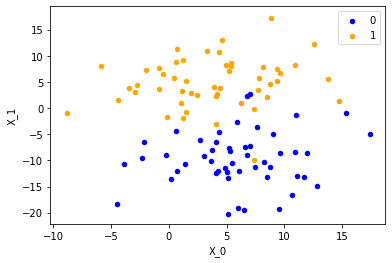

In [2]:
import matplotlib.pyplot as plt
from pandas import DataFrame
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'blue', 1:'orange'}
fig, ax  = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.show()

# Funcion Sigmoid

In [3]:
import numpy as np
def sigmoid(z):
    return 1/(1+np.exp(-z))

# Theta(i)*x(i)

In [4]:
def hx(theta, X):
    z = np.array(theta[0] + theta[1]*np.array(X[:,0]) + theta[2]*np.array(X[:,1]))
    return sigmoid(z)

# Costo de la funcion

In [5]:
def cost(theta, X, y):
    y_pred = hx(theta, X)
    return -1 * sum(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))

# Gradient Descent

In [6]:
def grad(theta, X, y):
    y_pred = hx(theta, X)
    g = [0]*3
    g[0] = -1*sum(y*(1-y_pred) - (1-y)*y_pred)
    g[1] = -1*sum(y*(1-y_pred) - (1-y)*y_pred*X[:,0])
    g[2] = -1*sum(y*(1-y_pred) - (1-y)*y_pred*X[:,1])
    return g

In [7]:
def descent(theta_new, theta_prev, alpha):
    print(theta_prev)
    print(cost(theta_prev, X, y))
    j=0
    while True:
        theta_prev = theta_new
        theta0 = theta_prev[0] - alpha*grad(theta_prev, X, y)[0]
        theta1 = theta_prev[1] - alpha*grad(theta_prev, X, y)[1]
        theta2 = theta_prev[2] - alpha*grad(theta_prev, X, y)[2]
        theta_new = [theta0, theta1, theta2]
        print(theta_new)
        print(cost(theta_new, X, y))
        if (theta_new[0]-theta_prev[0])**2 + (theta_new[1]-theta_prev[1])**2 + (theta_new[2]-theta_prev[2])**2 <pow(10,-6):
            return theta_new
        if j>100:
            return theta_new
        j+=1

# Parametros theta

In [8]:
theta = [1,1,1]

In [9]:
theta = descent(theta, theta, .001)
print(theta)

[1, 1, 1]
106.04574760103942
[0.9896100227618569, 0.8632156066155857, 1.0790457471014396]
84.39727727026904
[0.9827613252988656, 0.7556480733771888, 1.1255270053756792]
71.76028443505072
[0.9778092959881314, 0.6645739984398884, 1.1574245665251786]
63.10811084234645
[0.9741728874354295, 0.5853653964995947, 1.1801373786913263]
56.661209992430294
[0.9713980493293187, 0.5134864283277852, 1.1977782877675427]
51.413434210483224
[0.9692782122046886, 0.44684373203813027, 1.2122705965680458]
46.96912237594532
[0.9677244563251918, 0.38479054423018877, 1.224422755832916]
43.192852648014124
[0.9667105603637933, 0.3276902594109567, 1.234501021693675]
40.08236533621637
[0.9662449712725599, 0.2764880754826424, 1.2424965749782306]
37.64429922660052
[0.9662889090569795, 0.23123473157067254, 1.2485953238214114]
35.763888625343
[0.9667409034114467, 0.19072448187514487, 1.2532980153974576]
34.27064808405849
[0.9675109449060574, 0.15374571818706761, 1.2570780465319282]
33.04775689457498
[0.968549991901733,

# Visualizacion del Gradient Descent

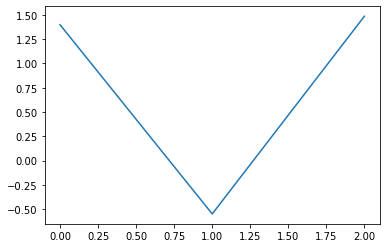

In [10]:
plt.plot(theta)

# Visualizacion del resultado

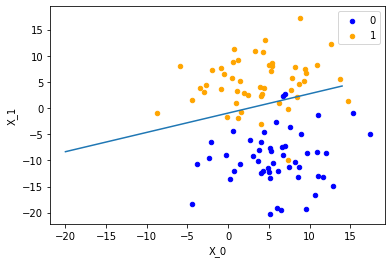

In [11]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  
    plt.plot(x, y)  
    
def my_formula(x):
    return (-theta[0]-theta[1]*x)/theta[2]

from matplotlib import pyplot as plt
from pandas import DataFrame 
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
graph(my_formula, range(-20,15))
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.show()